In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_csv(r'C:\Users\hites\Downloads\data.csv')

In [111]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [112]:
df.tail()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [114]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

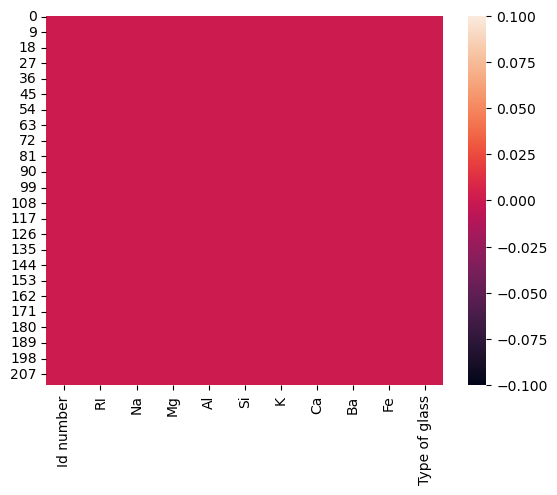

In [115]:
sns.heatmap(df.isnull())

In [116]:
df.drop(['Id number'],axis=1,inplace=True)

In [117]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# check the unique value of glass

In [118]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [119]:
df['Type of glass'].nunique()

6

In [120]:


df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

<AxesSubplot:xlabel='Type of glass', ylabel='count'>

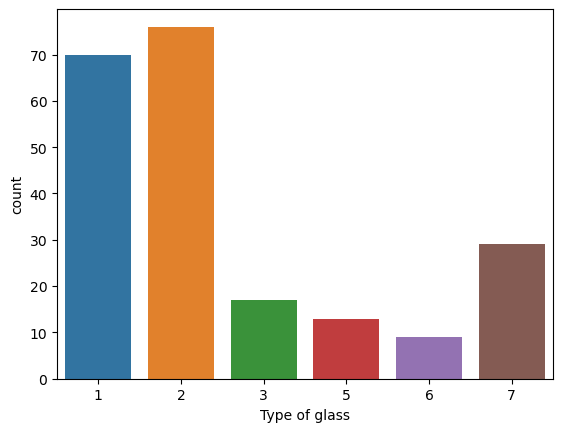

In [121]:
sns.countplot('Type of glass', data = df)

In [122]:
#now as we obseve the graph we observe that there are majority of glass 1,2 which are building_windows_float_processed and non float processed.

In [123]:
#As we observe in the graph we observe that there are majority of glass is 1 and 2 means windows glass also there are no sample of class 4 glass. very less samle of non windows glass only 48.

#When we convert it in 0 and 1 then we have to balance it due to it is imbalance here.

#Now we have to convert type of glass columns in value of 1 and 0 if the values of 1,2,3,4 then it is 0 otherwise 1.

In [124]:
df['Type of glass'].replace([1,2,3,4,5,6,7],[0,0,0,0,1,1,1],inplace=True)

In [125]:
#now In column Type of glass value is changed.

In [126]:
df['Type of glass'].unique()

array([0, 1], dtype=int64)

In [127]:
#Now we observe that there are only two values 0 and 1 0 means windows glass and 1 means non-windows glass.

#plot the value of type of glass

0    163
1     51
Name: Type of glass, dtype: int64 

0    76.168224
1    23.831776
Name: Type of glass, dtype: float64


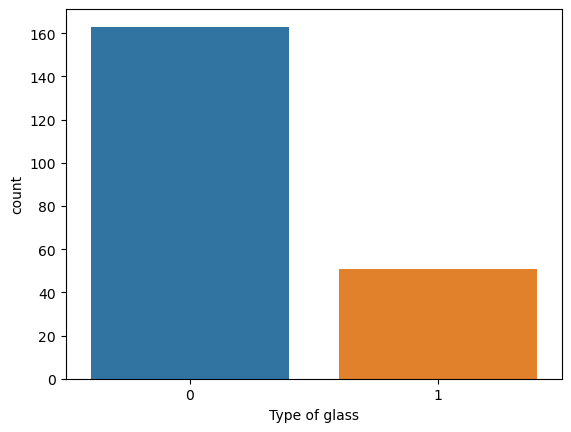

In [128]:
sns.countplot(df['Type of glass'])
print(df['Type of glass'].value_counts(),'\n')
print(df['Type of glass'].value_counts(normalize=True)*100)

In [129]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


# Data Visualization



In [130]:
#1.Using Univariate Plots

In [131]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

<AxesSubplot:xlabel='RI', ylabel='Count'>

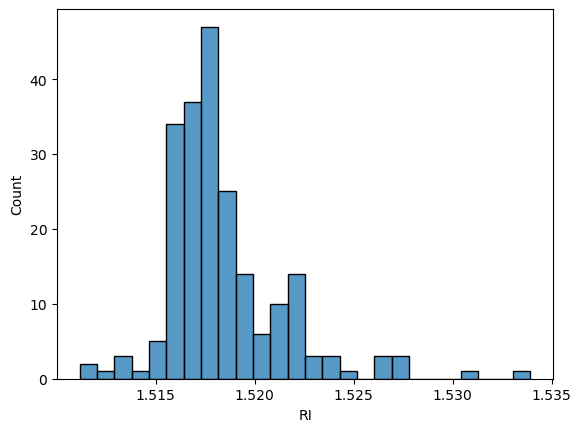

In [132]:
sns.histplot(df['RI'])

In [133]:
#we can observe that majority value of RI is between 1.17 to 1.19.

<AxesSubplot:xlabel='Na', ylabel='Count'>

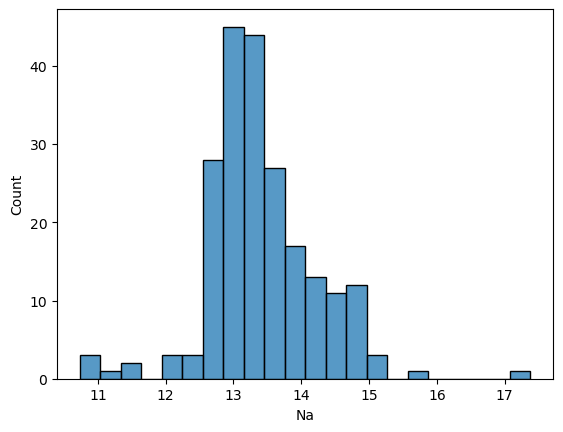

In [134]:
sns.histplot(df['Na'])

In [135]:
#we can observe that majority value of Na is between 13 to 13.5

<AxesSubplot:xlabel='Mg', ylabel='Count'>

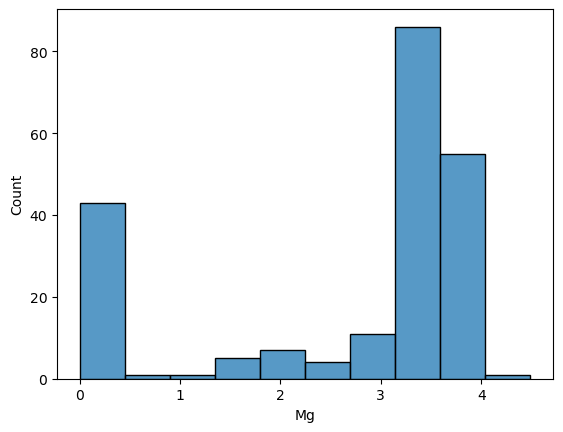

In [136]:
sns.histplot(df['Mg'])

In [137]:
# we can observe that majority value of Mg is between 3.2 to 3.4.

<AxesSubplot:xlabel='Al', ylabel='Count'>

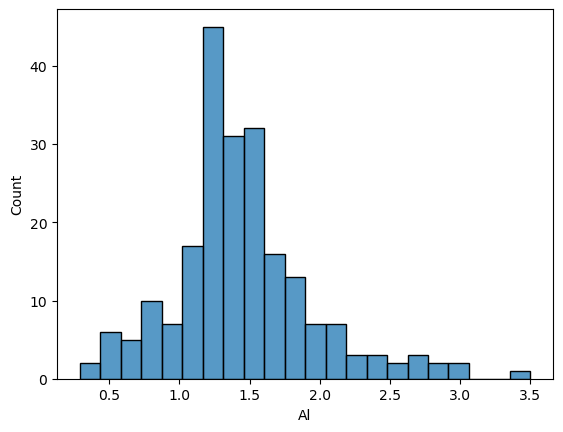

In [138]:
sns.histplot(df['Al'])

In [139]:
# we can observe that majority value of Al is between 1.2 to 1.4.

<AxesSubplot:xlabel='Si', ylabel='Count'>

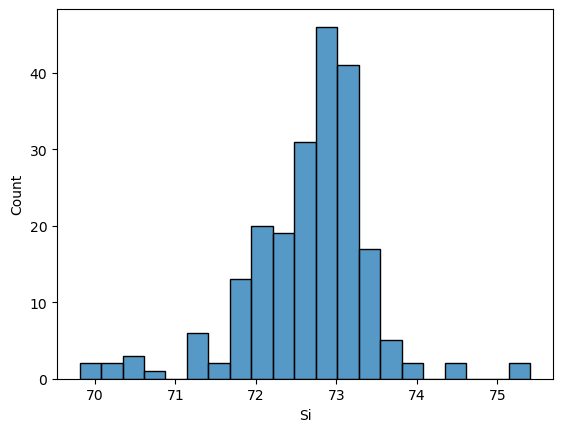

In [140]:
sns.histplot(df['Si'])

In [141]:
#we can observe that majority value of Si is between 72.9 to 73.2

<AxesSubplot:xlabel='K', ylabel='Count'>

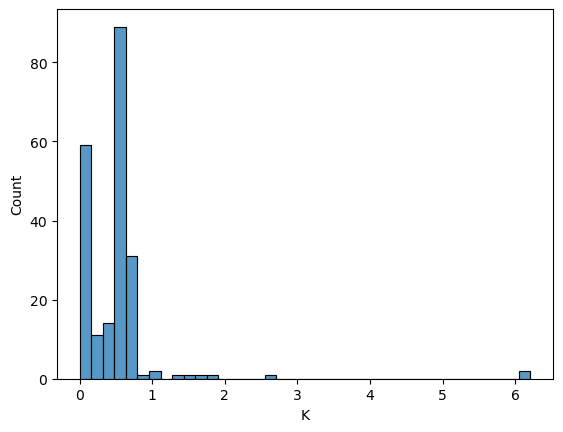

In [142]:
sns.histplot(df['K'])

In [143]:
#we can observe that majority value of K is between 0 to 0.6 remove the value of 0.2 to 0.5.

<AxesSubplot:xlabel='Ca', ylabel='Count'>

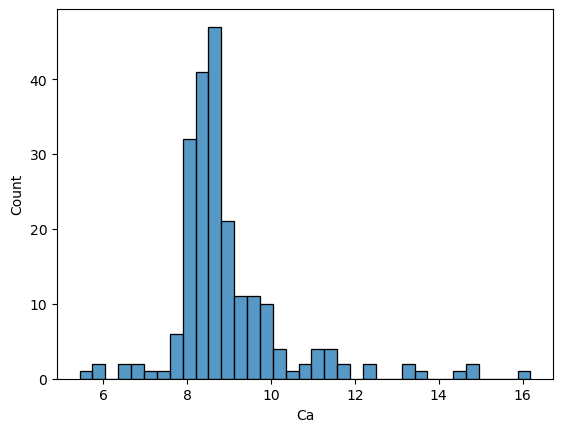

In [144]:
sns.histplot(df['Ca'])

In [145]:
#we can observe that majority value of Ca is between 8.3 to 9.

<AxesSubplot:xlabel='Ba', ylabel='Count'>

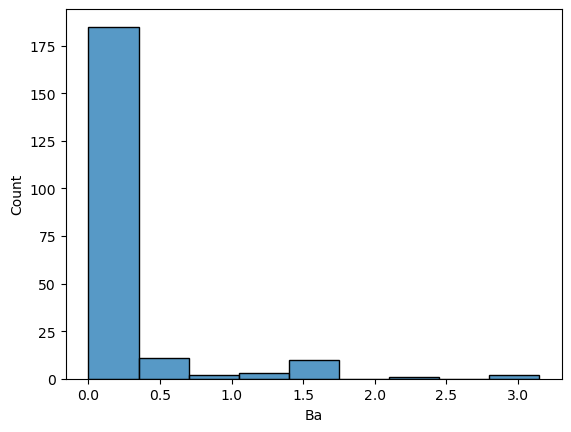

In [146]:
sns.histplot(df['Ba'])

In [147]:
#we can observe that majority value of Ba is between 0 to 0.4.

<AxesSubplot:xlabel='Fe', ylabel='Count'>

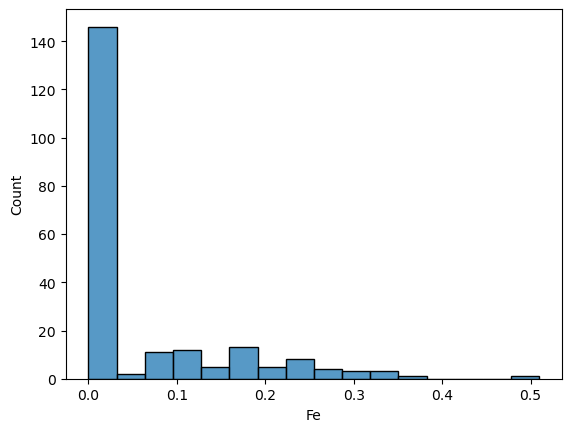

In [148]:
sns.histplot(df['Fe'])

In [149]:
#we can observe that majority value of Fe is between 0 to 0.05

# Check for skewness if there is present then what type of it right or left

RI


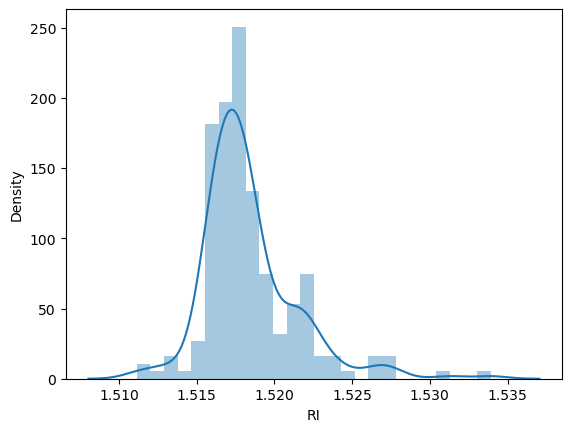

Na


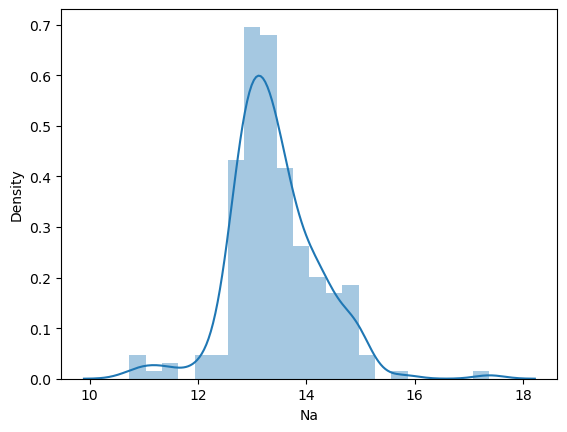

Mg


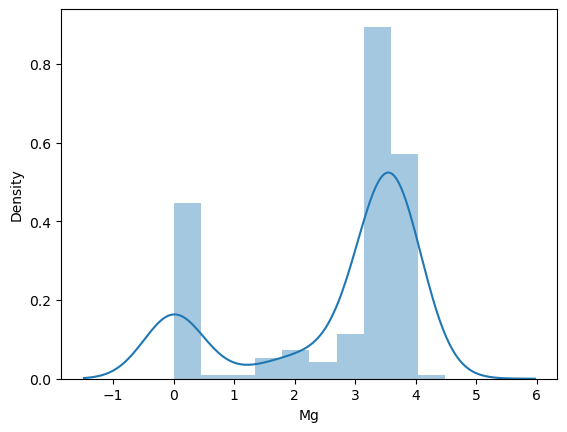

Al


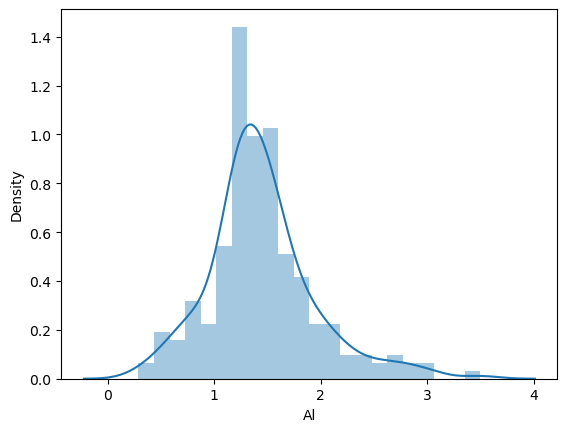

Si


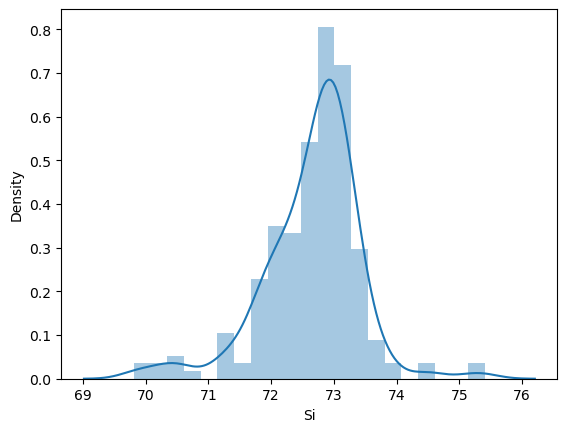

K


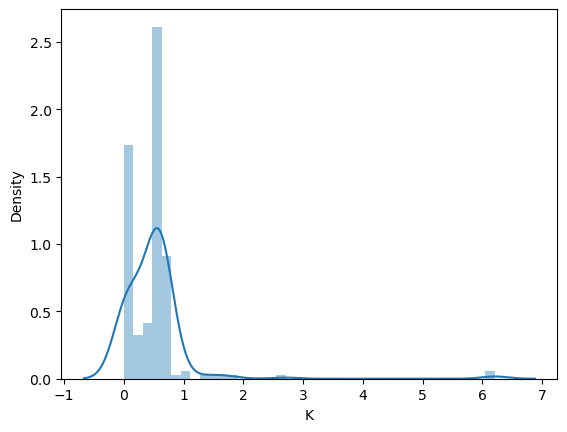

Ca


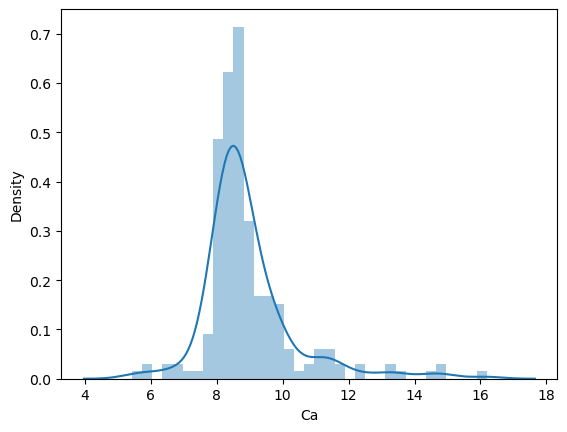

Ba


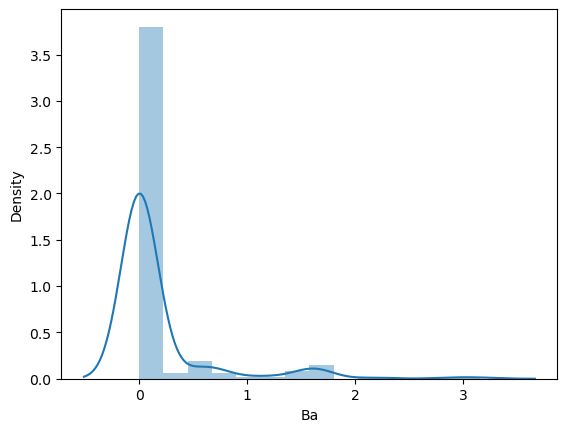

Fe


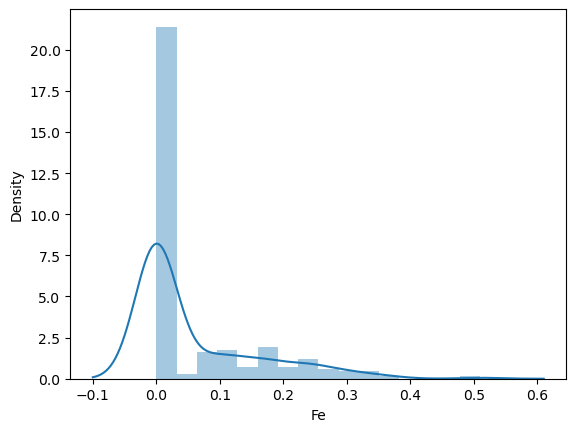

In [150]:
#lets see how data is distributed for every columns
for x in df.drop(['Type of glass'],axis=1):
    print(x)
    plt.plot(figsize=(7,9))
    sns.distplot(df[x])
    plt.show()

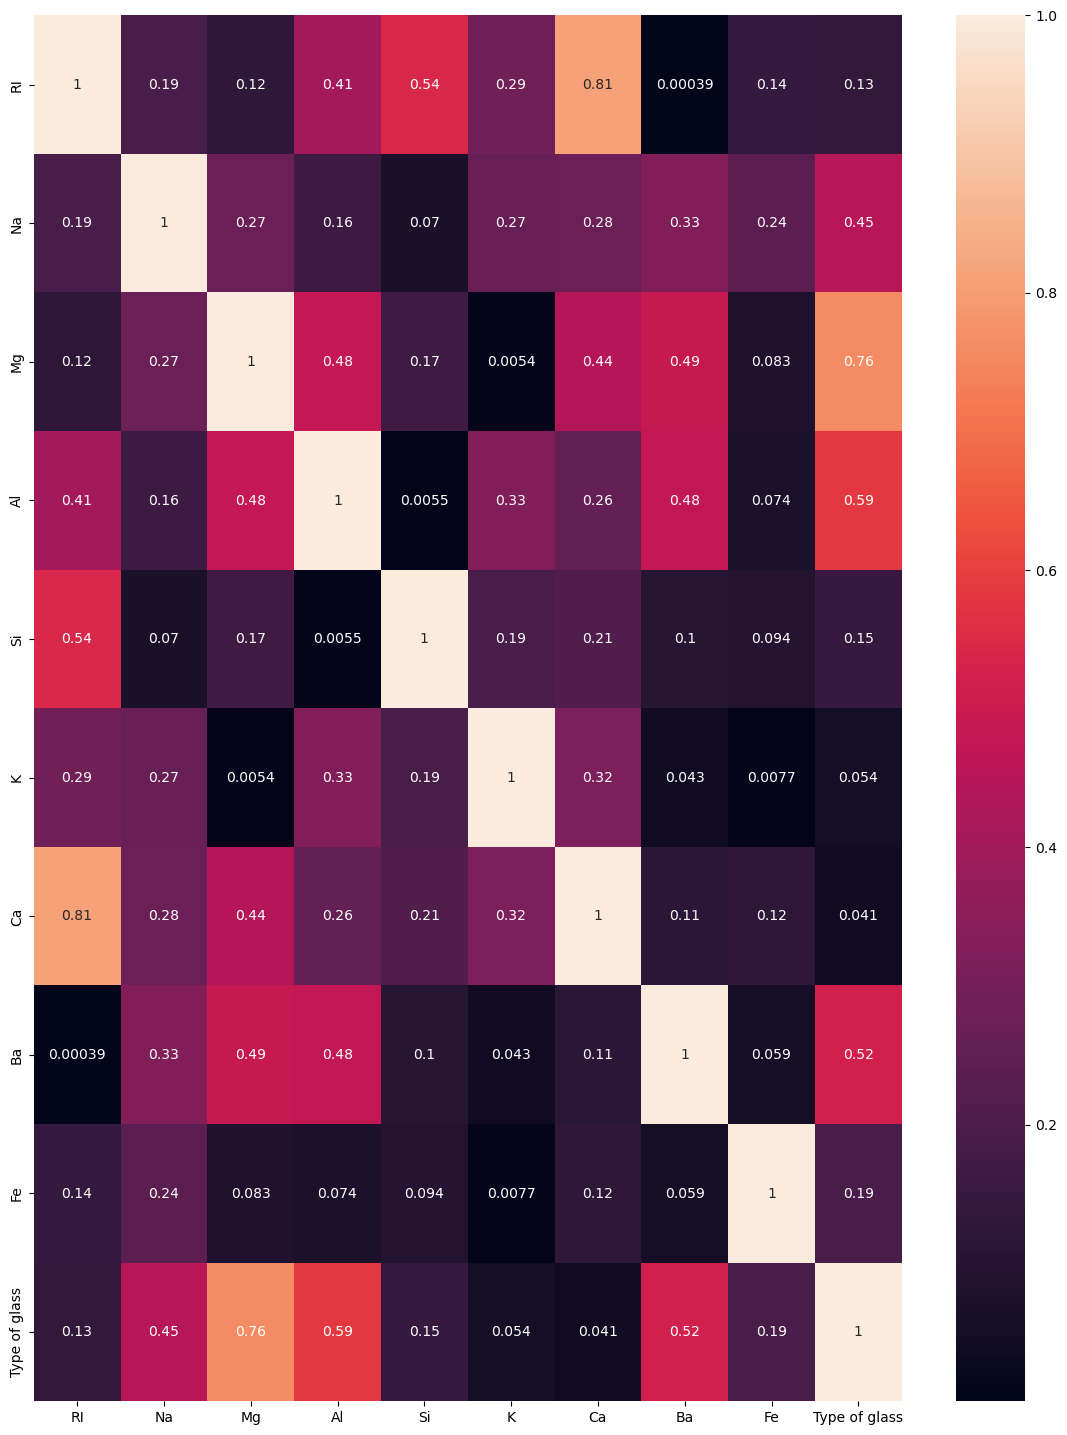

In [151]:
#plotting heatmap(correlation matrix)

df_corr = df.corr().abs()

plt.figure(figsize = (14,18))

sns.heatmap(df_corr,annot=True, annot_kws = {'size':10})
plt.show()


In [152]:
#Now plot correlation for features.

In [153]:
df.drop(['Type of glass'],axis=1).corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<AxesSubplot:>

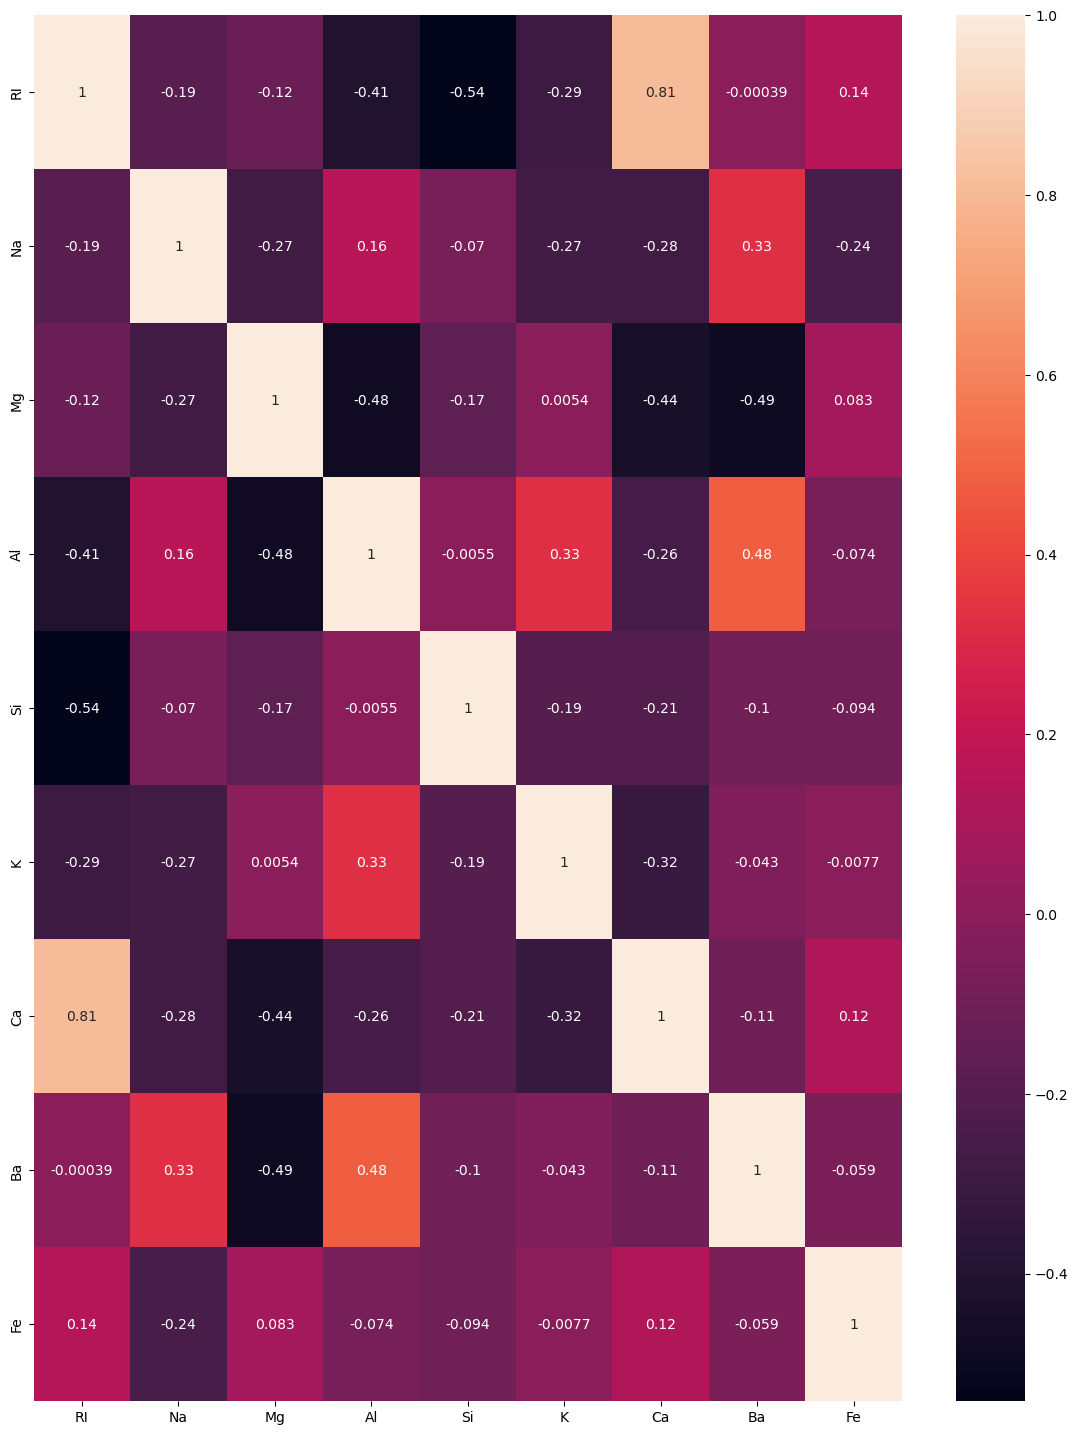

In [63]:
plt.figure(figsize=(14,18))
sns.heatmap(df.drop(['Type of glass'],axis=1).corr(),annot=True)

In [154]:
#as we obseved that RI vs Ca are highly correlated with each other and Na vs K are least realated 

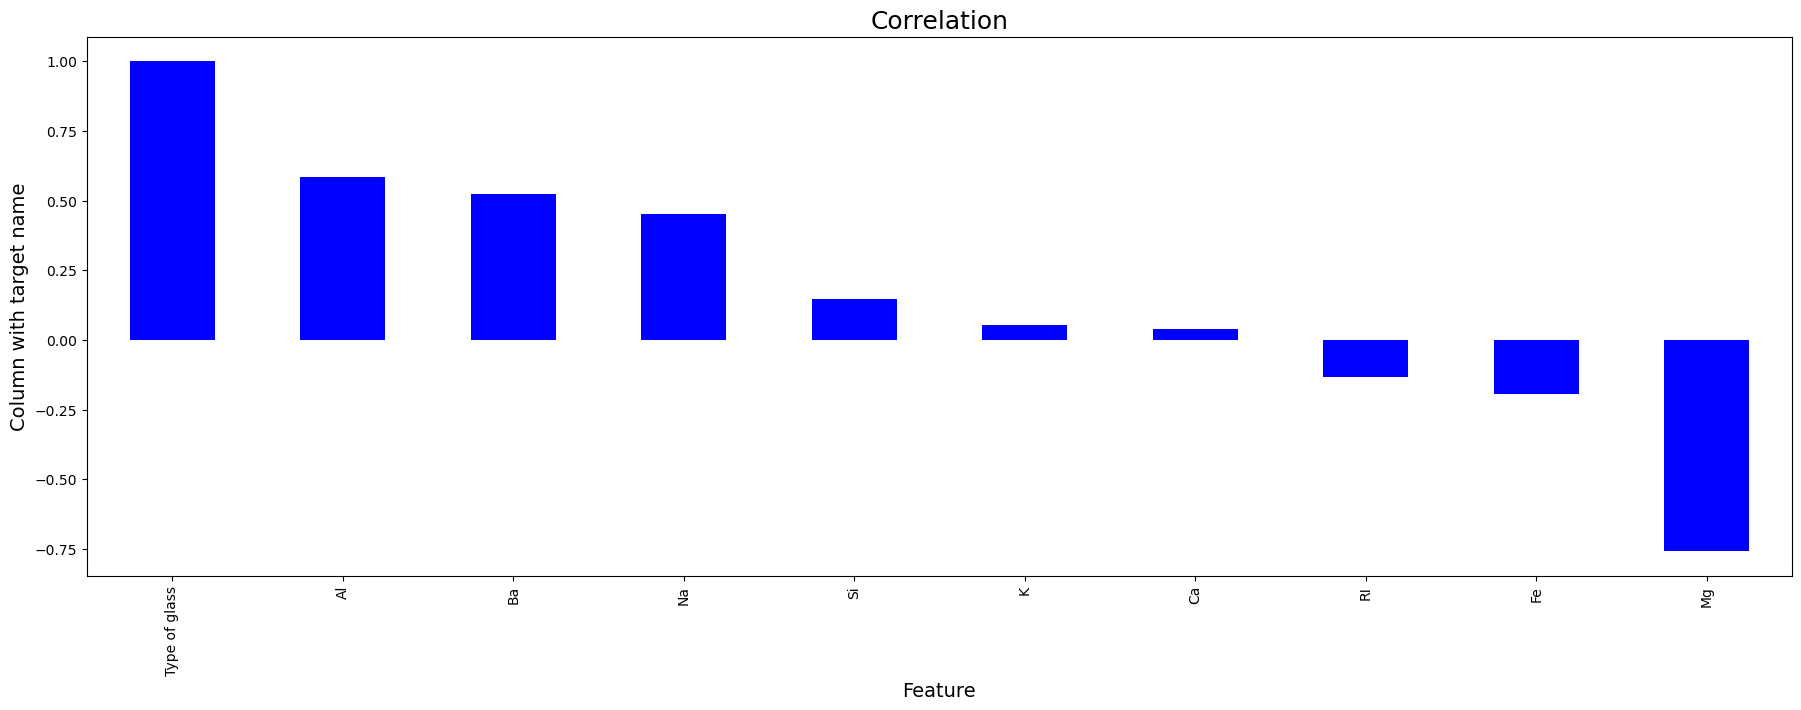

In [155]:
plt.figure(figsize=(22,7))
df.corr()['Type of glass'].sort_values(ascending=False).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target name',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [156]:
#we can observe Al is positively correleted and Mg is negatively.

In [157]:
#divide data set into features and label

y = df['Type of glass']

x = df.drop(columns = ['Type of glass'])

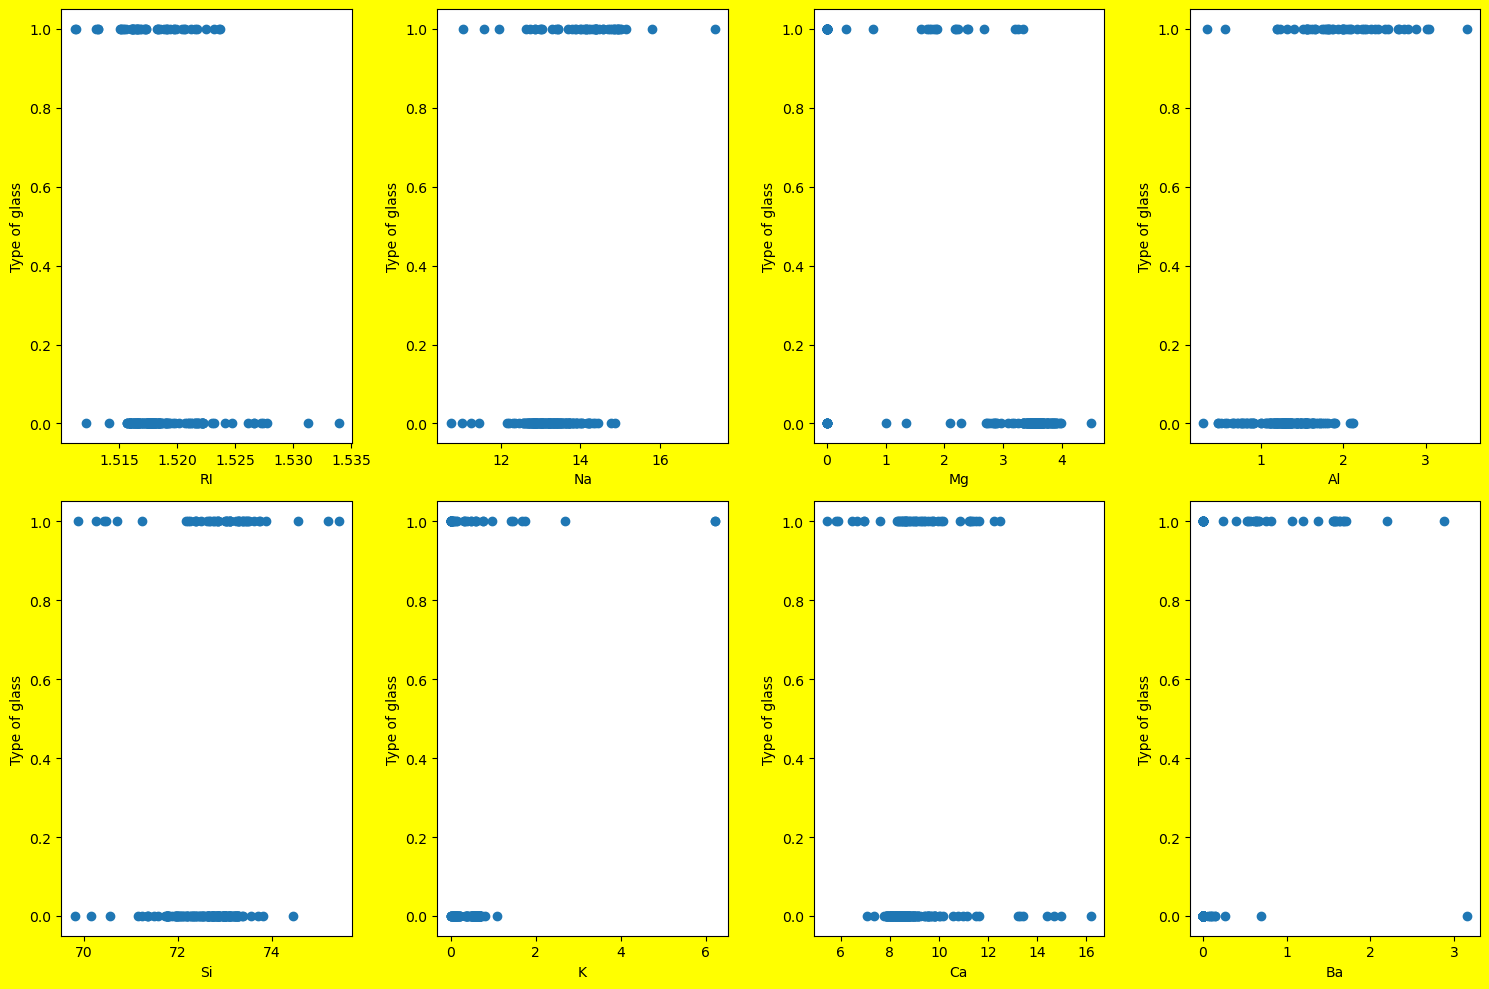

In [158]:
#visualising the relationship

plt.figure(figsize=(15,10), facecolor = 'yellow')
plotnumber = 1


for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Type of glass',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

# Check for outliers in features.

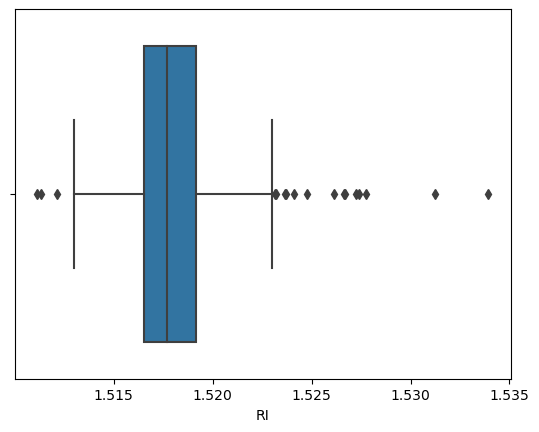

In [159]:
plt.plot(figsize=(6,4))
sns.boxplot(df['RI'])
plt.show()

In [45]:
# As we observe in RI column there are less outliers.

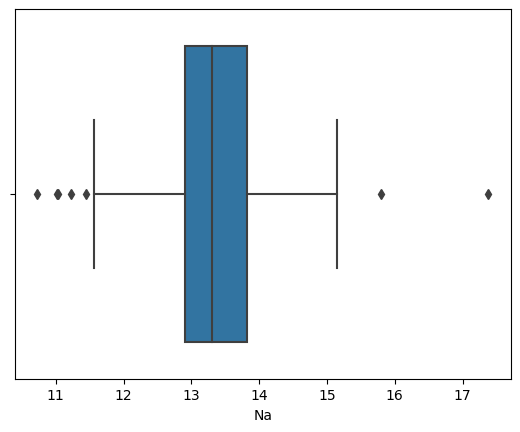

In [160]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Na'])
plt.show()

In [48]:
#As we observe in Na column there are some significant outliers.

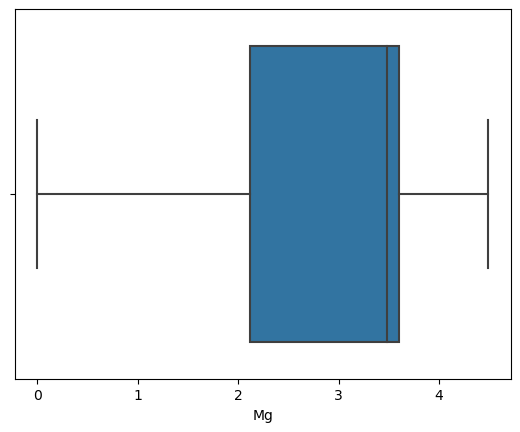

In [161]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Mg'])
plt.show()

In [50]:
#As we observe in Mg column there are no outliers.

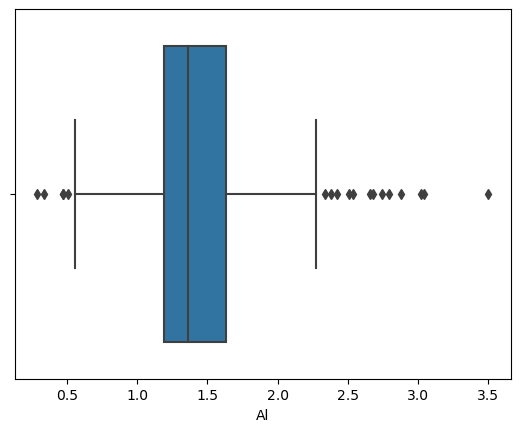

In [162]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Al'])
plt.show()

In [52]:
#As we observe in Al column there are to much outliers

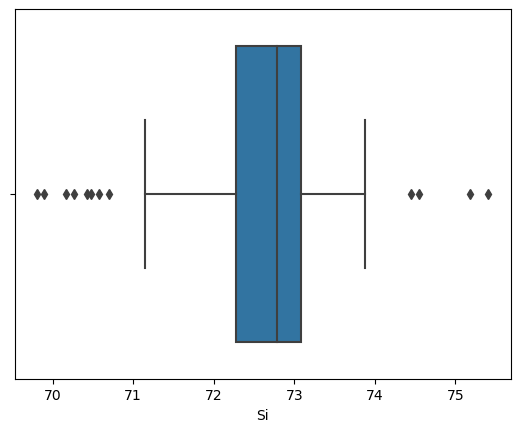

In [163]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Si'])
plt.show()

In [54]:
#As we observe in Si column there are outliers.

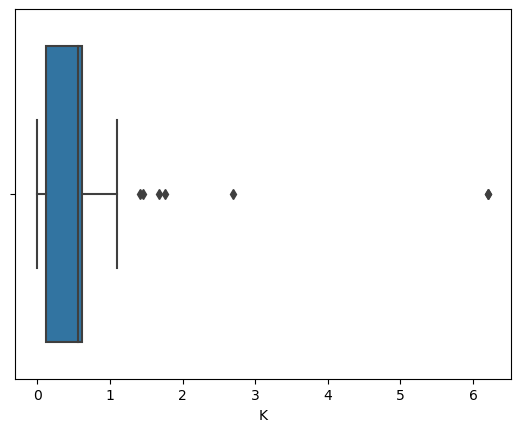

In [164]:
plt.plot(figsize=(6,4))
sns.boxplot(df['K'])
plt.show()

In [56]:
#As we observe in K column there are less outliers.

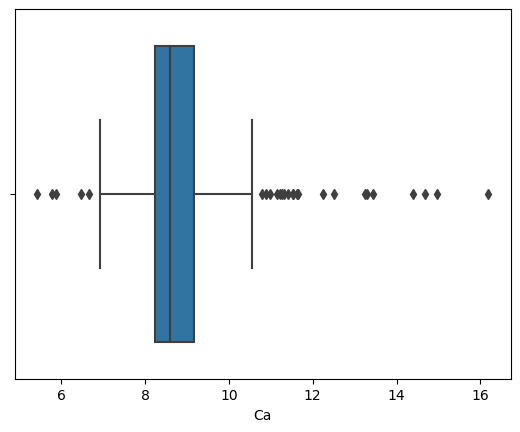

In [165]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Ca'])
plt.show()

In [58]:
#As we observe in Ca column there are to much outliers.

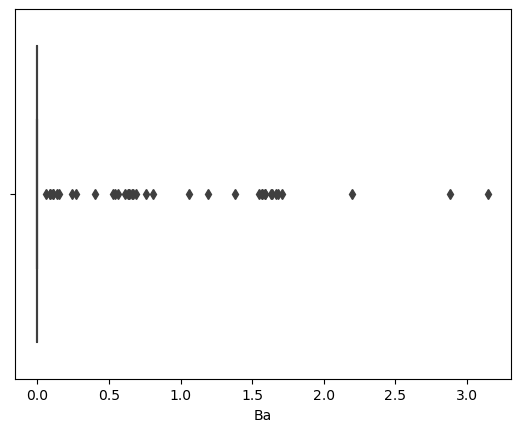

In [166]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Ba'])
plt.show()

In [60]:
#As we observe in Ba column there are to much outliers.

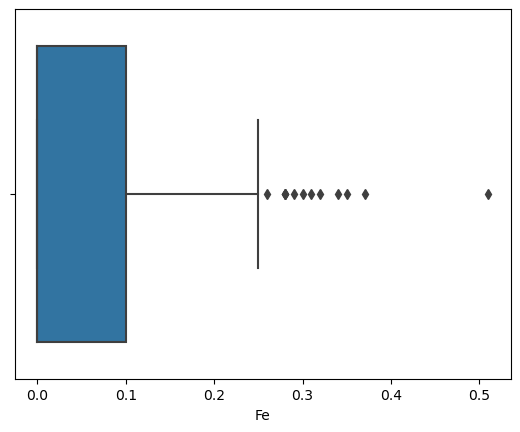

In [167]:
plt.plot(figsize=(6,4))
sns.boxplot(df['Fe'])
plt.show()

In [62]:
#As we observe in Fe column there are less outliers.

#for Ba column we observe there are many outliers. now check it's skewness if it is high then we should remove this column

In [168]:
df['Ba'].skew()

3.4164245693025577

In [169]:
df.drop(['Ba'],axis=1,inplace=True)

# Now we observe outliers in all columns there are outliers are present.
For remove outliers we have to spilt our data in features and target DataFrame and then we remove outliers in features columns

In [170]:
x=df.drop(['Type of glass'],axis=1)
y=df['Type of glass']

In [171]:
x.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0


In [172]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Type of glass, dtype: int64

In [173]:
x.shape

(214, 8)

In [174]:
y.shape

(214,)

In [175]:
#Now we remove outliers in only features columns


from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3

x=x[(z<3).all(axis=1)]
print(x.shape)

y=y[(z<3).all(axis=1)]
print(y.shape)

(198, 8)
(198,)


In [176]:
#Check % data loss

In [177]:
loss=round((214-198)/214*100,2)
loss

7.48

In [178]:
x.skew()

RI    0.964230
Na    0.464034
Mg   -1.424633
Al    0.620498
Si   -0.622500
K     0.430888
Ca    1.021982
Fe    1.517610
dtype: float64

In [179]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [180]:
vif_calc()

      VIF Factor features
0  103272.379048       RI
1    3388.482556       Na
2      76.732827       Mg
3      42.013963       Al
4   54944.801876       Si
5      11.691601        K
6     816.325560       Ca
7       1.438403       Fe


In [181]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x#for scaling we use standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.2759299 ,  0.27941077,  1.23707418, ..., -1.2783205 ,
        -0.05836583, -0.59475276],
       [-0.20403359,  0.63753694,  0.57339953, ...,  0.16682812,
        -0.9861075 , -0.59475276],
       [-0.82648882,  0.12183525,  0.53611444, ..., -0.14284658,
        -1.03652825, -0.59475276],
       ...,
       [ 1.11922788,  1.31081415, -2.11112714, ..., -1.48477031,
        -0.37097444, -0.59475276],
       [-0.6828453 ,  1.33946425, -2.11112714, ..., -1.48477031,
        -0.33063784, -0.59475276],
       [-0.42167528,  1.12458854, -2.11112714, ..., -1.48477031,
        -0.18945976, -0.59475276]])

In [182]:
y.value_counts()

0    154
1     44
Name: Type of glass, dtype: int64

In [190]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [191]:
y.value_counts()

0    154
1    154
Name: Type of glass, dtype: int64

In [192]:
lr=LogisticRegression()

In [193]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25,stratify=y)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model perform very well')
        print('Random State = ',i)
        print("Training accuracy score is = ",accuracy_score(y_train,pred_train))
        print("Test accuracy score is = ",accuracy_score(y_test,pred_test))
        print('\n')

At random state 2 The model perform very well
Random State =  2
Training accuracy score is =  0.961038961038961
Test accuracy score is =  0.961038961038961


At random state 8 The model perform very well
Random State =  8
Training accuracy score is =  0.961038961038961
Test accuracy score is =  0.961038961038961


At random state 10 The model perform very well
Random State =  10
Training accuracy score is =  0.961038961038961
Test accuracy score is =  0.961038961038961


At random state 16 The model perform very well
Random State =  16
Training accuracy score is =  0.961038961038961
Test accuracy score is =  0.961038961038961


At random state 26 The model perform very well
Random State =  26
Training accuracy score is =  0.961038961038961
Test accuracy score is =  0.961038961038961


At random state 48 The model perform very well
Random State =  48
Training accuracy score is =  0.961038961038961
Test accuracy score is =  0.961038961038961


At random state 75 The model perform very we

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=777,test_size=0.25,stratify=y)

In [195]:
y_train.value_counts()

0    116
1    115
Name: Type of glass, dtype: int64

In [196]:
y_test.value_counts()

1    39
0    38
Name: Type of glass, dtype: int64

In [197]:
#Logistic Regression
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy of model =',accuracy_score(y_test,pred_lr)*100,'%',)
print('\n')
print('Confusion matrix','\n',confusion_matrix(y_test,pred_lr))
print('\n')
print('Classification Report','\n',classification_report(y_test,pred_lr))

Accuracy of model = 94.8051948051948 %


Confusion matrix 
 [[37  1]
 [ 3 36]]


Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.97      0.92      0.95        39

    accuracy                           0.95        77
   macro avg       0.95      0.95      0.95        77
weighted avg       0.95      0.95      0.95        77

